In [1]:
import pandas as pd 
df = pd.read_csv('../../Datasets/crypto_sentiment.csv')
df.head()

,timestamp,cryptocurrency,current_price_usd,price_change_24h_percent,trading_volume_24h,market_cap_usd,social_sentiment_score,news_sentiment_score,news_impact_score,social_mentions_count,fear_greed_index,volatility_index,rsi_technical_indicator,prediction_confidence
0,2025-06-04 20:36:49,Algorand,0.3427,-5.35,1716266.10,1.762124e+09,0.367,0.374,1.87,13,53.2,95.1,37.2,78.1
1,2025-06-04 20:48:25,Cosmos,12.0420,5.14,10520739.91,2.099178e+11,-0.278,-0.107,1.01,600,43.5,76.7,65.0,66.7
2,2025-06-04 21:28:54,Cosmos,11.7675,-6.12,642191.11,1.755367e+11,-0.255,0.211,5.69,279,49.1,60.4,32.3,77.4
3,2025-06-04 21:57:48,Ethereum,2861.2829,-11.54,5356227.76,4.786419e+13,-0.531,-0.081,5.11,3504,37.0,100.0,63.0,81.7
4,2025-06-04 22:06:40,Solana,95.3583,5.79,735971.56,2.667611e+11,0.369,0.248,1.82,3236,61.7,67.5,55.4,81.8


In [2]:
df['cryptocurrency'].unique()

array(['Algorand', 'Cosmos', 'Ethereum', 'Solana', 'Polkadot', 'Bitcoin',
       'Avalanche', 'Polygon', 'Cardano', 'Chainlink'], dtype=object)

In [3]:
df.isnull().sum()

timestamp                   0
cryptocurrency              0
current_price_usd           0
price_change_24h_percent    0
trading_volume_24h          0
market_cap_usd              0
social_sentiment_score      0
news_sentiment_score        0
news_impact_score           0
social_mentions_count       0
fear_greed_index            0
volatility_index            0
rsi_technical_indicator     0
prediction_confidence       0
dtype: int64

In [4]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() 
df['price_change_24h_percent'] = scaler.fit_transform(df[['price_change_24h_percent']]).ravel()
df['news_sentiment_score'] = scaler.fit_transform(df[['news_sentiment_score']]).ravel()

<Axes: xlabel='news_sentiment_score', ylabel='price_change_24h_percent'>

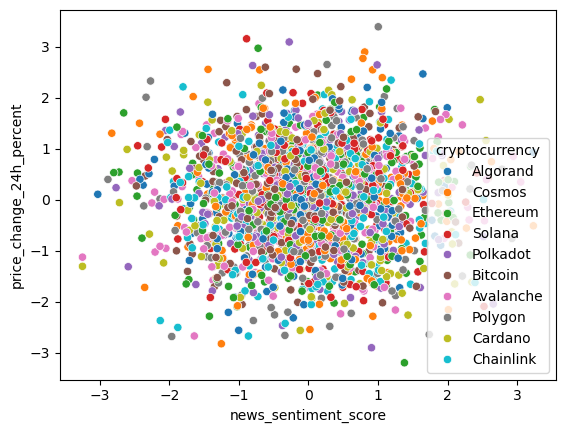

In [5]:
# Scatter Plot between Price Change in 24h and the News Sentiment Score 
import seaborn as sns 
sns.scatterplot(x='news_sentiment_score' , y='price_change_24h_percent' , data = df , hue='cryptocurrency')

In [6]:
df

,timestamp,cryptocurrency,current_price_usd,price_change_24h_percent,trading_volume_24h,market_cap_usd,social_sentiment_score,news_sentiment_score,news_impact_score,social_mentions_count,fear_greed_index,volatility_index,rsi_technical_indicator,prediction_confidence
0,2025-06-04 20:36:49,Algorand,0.3427,-0.666587,1716266.10,1.762124e+09,0.367,1.203785,1.87,13,53.2,95.1,37.2,78.1
1,2025-06-04 20:48:25,Cosmos,12.0420,0.644844,10520739.91,2.099178e+11,-0.278,-0.354293,1.01,600,43.5,76.7,65.0,66.7
2,2025-06-04 21:28:54,Cosmos,11.7675,-0.762850,642191.11,1.755367e+11,-0.255,0.675788,5.69,279,49.1,60.4,32.3,77.4
3,2025-06-04 21:57:48,Ethereum,2861.2829,-1.440443,5356227.76,4.786419e+13,-0.531,-0.270073,5.11,3504,37.0,100.0,63.0,81.7
4,2025-06-04 22:06:40,Solana,95.3583,0.726105,735971.56,2.667611e+11,0.369,0.795640,1.82,3236,61.7,67.5,55.4,81.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2058,2025-07-04 17:16:03,Cardano,0.4492,-0.580325,6345791.01,8.185563e+09,0.327,0.021459,2.54,1695,56.5,77.3,51.9,72.4
2059,2025-07-04 17:25:39,Ethereum,3077.3009,0.043511,590629.81,2.546980e+13,-0.277,-0.470906,2.31,1093,40.1,30.4,40.5,79.2
2060,2025-07-04 17:43:50,Polkadot,8.1297,1.493711,24276229.78,1.224982e+11,0.216,-0.004455,3.07,401,51.7,93.3,41.6,71.0
2061,2025-07-04 19:31:59,Polygon,1.1212,-0.967878,2126227.67,2.240884e+10,0.144,0.510586,2.32,202,66.3,76.2,37.6,74.8


<Axes: xlabel='fear_greed_index', ylabel='price_change_24h_percent'>

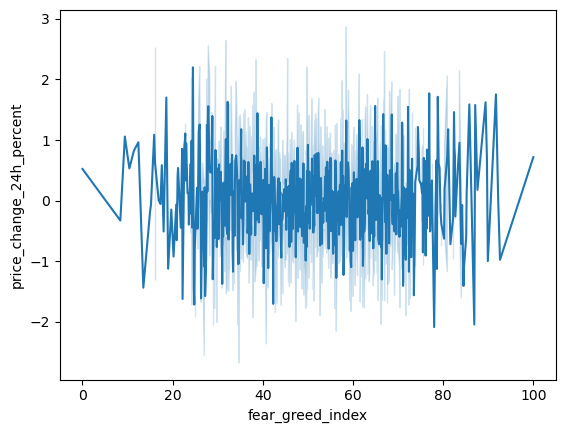

In [7]:
# Price Change in 24h based on the fear greed index
sns.lineplot(x='fear_greed_index' , y='price_change_24h_percent' , data = df)

<Axes: xlabel='prediction_confidence', ylabel='Count'>

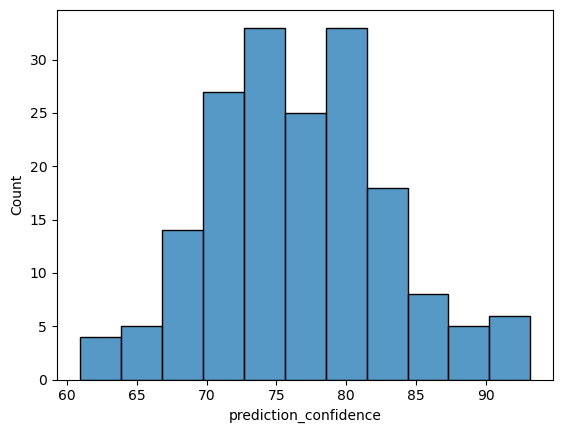

In [8]:
# Prediction confidence of the Bitcoin
bitcoin_df = df[df['cryptocurrency'] == 'Bitcoin']
sns.histplot( x='prediction_confidence' , data = bitcoin_df)

In [12]:
# Handling the Outliers in the Dataset 
df

,timestamp,cryptocurrency,current_price_usd,price_change_24h_percent,trading_volume_24h,market_cap_usd,social_sentiment_score,news_sentiment_score,news_impact_score,social_mentions_count,fear_greed_index,volatility_index,rsi_technical_indicator,prediction_confidence
0,2025-06-04 20:36:49,Algorand,0.3427,-0.666587,1716266.10,1.762124e+09,0.367,1.203785,1.87,13,53.2,95.1,37.2,78.1
1,2025-06-04 20:48:25,Cosmos,12.0420,0.644844,10520739.91,2.099178e+11,-0.278,-0.354293,1.01,600,43.5,76.7,65.0,66.7
2,2025-06-04 21:28:54,Cosmos,11.7675,-0.762850,642191.11,1.755367e+11,-0.255,0.675788,5.69,279,49.1,60.4,32.3,77.4
3,2025-06-04 21:57:48,Ethereum,2861.2829,-1.440443,5356227.76,4.786419e+13,-0.531,-0.270073,5.11,3504,37.0,100.0,63.0,81.7
4,2025-06-04 22:06:40,Solana,95.3583,0.726105,735971.56,2.667611e+11,0.369,0.795640,1.82,3236,61.7,67.5,55.4,81.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2058,2025-07-04 17:16:03,Cardano,0.4492,-0.580325,6345791.01,8.185563e+09,0.327,0.021459,2.54,1695,56.5,77.3,51.9,72.4
2059,2025-07-04 17:25:39,Ethereum,3077.3009,0.043511,590629.81,2.546980e+13,-0.277,-0.470906,2.31,1093,40.1,30.4,40.5,79.2
2060,2025-07-04 17:43:50,Polkadot,8.1297,1.493711,24276229.78,1.224982e+11,0.216,-0.004455,3.07,401,51.7,93.3,41.6,71.0
2061,2025-07-04 19:31:59,Polygon,1.1212,-0.967878,2126227.67,2.240884e+10,0.144,0.510586,2.32,202,66.3,76.2,37.6,74.8


<Axes: xlabel='price_change_24h_percent'>

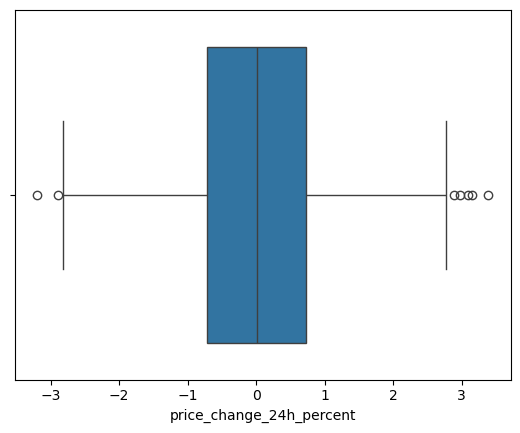

In [14]:
sns.boxplot(x='price_change_24h_percent' , data = df)

<Axes: xlabel='price_change_24h_percent', ylabel='Count'>

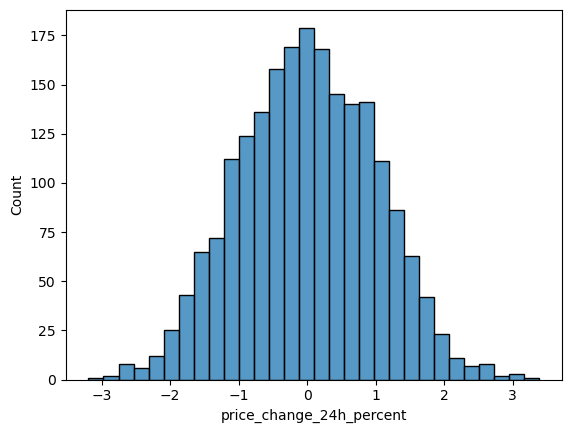

In [15]:
sns.histplot(x='price_change_24h_percent' , data = df)

In [23]:
# Using Z-Score
mean = df['price_change_24h_percent'].mean()
std = df['price_change_24h_percent'].std()
z_scores = []
for x in df['price_change_24h_percent'] :
    z_scores.append((x-mean)/std)
z_scores = np.array(z_scores)
threshold = 3 
outliers = df[abs(z_scores) > threshold]['price_change_24h_percent']
print(outliers)

633     3.152690
911     3.387722
1183   -3.193185
1596    3.090181
Name: price_change_24h_percent, dtype: float64


In [28]:
# using IQR [InterQuartile Range]
Q1 = df['price_change_24h_percent'].quantile(0.25)
Q3 = df['price_change_24h_percent'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5*IQR 
upper_bound = Q3 + 1.5*IQR

outliers_IQR = df[(df['price_change_24h_percent'] < lower_bound) | (df['price_change_24h_percent'] > upper_bound)]
print(outliers_IQR.shape)

(7, 14)


In [31]:
# Handling Outliers
# Removing Outliers
df_removed = df[(df['price_change_24h_percent'] >= lower_bound) & (df['price_change_24h_percent'] <= upper_bound)]
df_removed.head()

,timestamp,cryptocurrency,current_price_usd,price_change_24h_percent,trading_volume_24h,market_cap_usd,social_sentiment_score,news_sentiment_score,news_impact_score,social_mentions_count,fear_greed_index,volatility_index,rsi_technical_indicator,prediction_confidence
0,2025-06-04 20:36:49,Algorand,0.3427,-0.666587,1716266.10,1.762124e+09,0.367,1.203785,1.87,13,53.2,95.1,37.2,78.1
1,2025-06-04 20:48:25,Cosmos,12.0420,0.644844,10520739.91,2.099178e+11,-0.278,-0.354293,1.01,600,43.5,76.7,65.0,66.7
2,2025-06-04 21:28:54,Cosmos,11.7675,-0.762850,642191.11,1.755367e+11,-0.255,0.675788,5.69,279,49.1,60.4,32.3,77.4
3,2025-06-04 21:57:48,Ethereum,2861.2829,-1.440443,5356227.76,4.786419e+13,-0.531,-0.270073,5.11,3504,37.0,100.0,63.0,81.7
4,2025-06-04 22:06:40,Solana,95.3583,0.726105,735971.56,2.667611e+11,0.369,0.795640,1.82,3236,61.7,67.5,55.4,81.8


In [32]:
# Log Transformation 
import numpy as np
df_log = df.copy()
df_log['price_change_24h_percent'] = np.log(df['price_change_24h_percent'] + 1)
df_log.head()

d:\Machine Learning\Ananconda\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,timestamp,cryptocurrency,current_price_usd,price_change_24h_percent,trading_volume_24h,market_cap_usd,social_sentiment_score,news_sentiment_score,news_impact_score,social_mentions_count,fear_greed_index,volatility_index,rsi_technical_indicator,prediction_confidence
0,2025-06-04 20:36:49,Algorand,0.3427,-1.098372,1716266.10,1.762124e+09,0.367,1.203785,1.87,13,53.2,95.1,37.2,78.1
1,2025-06-04 20:48:25,Cosmos,12.0420,0.497646,10520739.91,2.099178e+11,-0.278,-0.354293,1.01,600,43.5,76.7,65.0,66.7
2,2025-06-04 21:28:54,Cosmos,11.7675,-1.439062,642191.11,1.755367e+11,-0.255,0.675788,5.69,279,49.1,60.4,32.3,77.4
3,2025-06-04 21:57:48,Ethereum,2861.2829,NaN,5356227.76,4.786419e+13,-0.531,-0.270073,5.11,3504,37.0,100.0,63.0,81.7
4,2025-06-04 22:06:40,Solana,95.3583,0.545868,735971.56,2.667611e+11,0.369,0.795640,1.82,3236,61.7,67.5,55.4,81.8


In [34]:
# Imputation 
df_imp = df.copy()
median_val = df['price_change_24h_percent'].median()
df_imp.loc[(df['price_change_24h_percent'] < lower_bound) | (df['price_change_24h_percent'] > upper_bound) , df['price_change_24h_percent']] = median_val
df.head()

,timestamp,cryptocurrency,current_price_usd,price_change_24h_percent,trading_volume_24h,market_cap_usd,social_sentiment_score,news_sentiment_score,news_impact_score,social_mentions_count,fear_greed_index,volatility_index,rsi_technical_indicator,prediction_confidence
0,2025-06-04 20:36:49,Algorand,0.3427,-0.666587,1716266.10,1.762124e+09,0.367,1.203785,1.87,13,53.2,95.1,37.2,78.1
1,2025-06-04 20:48:25,Cosmos,12.0420,0.644844,10520739.91,2.099178e+11,-0.278,-0.354293,1.01,600,43.5,76.7,65.0,66.7
2,2025-06-04 21:28:54,Cosmos,11.7675,-0.762850,642191.11,1.755367e+11,-0.255,0.675788,5.69,279,49.1,60.4,32.3,77.4
3,2025-06-04 21:57:48,Ethereum,2861.2829,-1.440443,5356227.76,4.786419e+13,-0.531,-0.270073,5.11,3504,37.0,100.0,63.0,81.7
4,2025-06-04 22:06:40,Solana,95.3583,0.726105,735971.56,2.667611e+11,0.369,0.795640,1.82,3236,61.7,67.5,55.4,81.8


In [35]:
# Capping / Winsorizing
lower_cap = df['price_change_24h_percent'].quantile(0.05)
upper_cap = df['price_change_24h_percent'].quantile(0.95)

df['price_change_24h_percent'] = np.where(df['price_change_24h_percent'] < lower_bound , lower_cap , df['price_change_24h_percent'])
df['price_change_24h_percent'] = np.where(df['price_change_24h_percent'] > upper_bound , upper_cap , df['price_change_24h_percent'])

df.head()

,timestamp,cryptocurrency,current_price_usd,price_change_24h_percent,trading_volume_24h,market_cap_usd,social_sentiment_score,news_sentiment_score,news_impact_score,social_mentions_count,fear_greed_index,volatility_index,rsi_technical_indicator,prediction_confidence
0,2025-06-04 20:36:49,Algorand,0.3427,-0.666587,1716266.10,1.762124e+09,0.367,1.203785,1.87,13,53.2,95.1,37.2,78.1
1,2025-06-04 20:48:25,Cosmos,12.0420,0.644844,10520739.91,2.099178e+11,-0.278,-0.354293,1.01,600,43.5,76.7,65.0,66.7
2,2025-06-04 21:28:54,Cosmos,11.7675,-0.762850,642191.11,1.755367e+11,-0.255,0.675788,5.69,279,49.1,60.4,32.3,77.4
3,2025-06-04 21:57:48,Ethereum,2861.2829,-1.440443,5356227.76,4.786419e+13,-0.531,-0.270073,5.11,3504,37.0,100.0,63.0,81.7
4,2025-06-04 22:06:40,Solana,95.3583,0.726105,735971.56,2.667611e+11,0.369,0.795640,1.82,3236,61.7,67.5,55.4,81.8


<Axes: xlabel='price_change_24h_percent'>

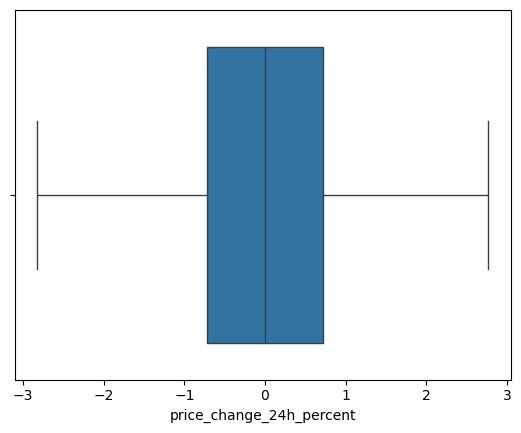

In [36]:
sns.boxplot(x='price_change_24h_percent' , data =df)